# Análise de Revenue e Orçamento: Tendências e Padrões em Filmes da Netflix

## =======================================================

In [1]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

## - BASE TOMATOES 

In [2]:
df_tomatoes = pd.read_csv('rotten_tomatoes_movies.csv')  # Carrega o CSV em um DataFrame
colunas = df_tomatoes.columns.tolist()  # Obtém os nomes das colunas
print(colunas)  # Exibe os nomes das colunas

['rotten_tomatoes_link', 'movie_title', 'movie_info', 'critics_consensus', 'content_rating', 'genres', 'directors', 'authors', 'actors', 'original_release_date', 'streaming_release_date', 'runtime', 'production_company', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count', 'audience_status', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']


## - BASE NETFLIX 

In [3]:
df_netflix = pd.read_csv('netflix_titles.csv') # Carrega o CSV em um DataFrame 
colunas = df_netflix.columns.tolist() # Obtém os nomes das colunas
print(colunas) # Exibe os nomes das colunas

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


## - BASE IMDB

In [4]:
df_imdb = pd.read_csv('imdb_movies.csv') # Carrega o CSV em um DataFrame 
colunas = df_imdb.columns.tolist() # Obtém os nomes das colunas
print(colunas) # Exibe os nomes das colunas

['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title', 'status', 'orig_lang', 'budget_x', 'revenue', 'country']


# ---------------------------------------------------------------------------------

## - JOIN DAS BASES NETFLIX,TOMATOES E IMDB

In [18]:
# Faz a união dos DataFrames df_tomatoes e df_netflix com base nos títulos dos filmes
# Chave para a fusão: 'movie_title' em df_tomatoes e 'title' em df_netflix
merged_df = pd.merge(df_tomatoes, df_netflix, left_on='movie_title', right_on='title', how='outer')

# Extrai IDs da coluna rotten_tomatoes_link
merged_df['rotten_tomatoes_id'] = merged_df['rotten_tomatoes_link'].str.extract(r'(\d+)')

# Faz a união com df_imdb usando os títulos dos filmes
# Chave para a fusão: 'movie_title' em merged_df e 'names' em df_imdb
merged_df = pd.merge(merged_df, df_imdb, left_on='movie_title', right_on='names', how='outer')

# Substitui valores ausentes por 0
merged_df = merged_df.fillna(0)

# Salva o DataFrame resultante em um arquivo CSV
merged_df.to_csv('merged_data.csv', index=False)

# Define uma função para exibir uma página de 10 linhas do DataFrame
def show_page(page):
    start = page * 10
    end = start + 10
    display(merged_df.iloc[start:end])

# Configura um controle deslizante para navegar pelas páginas
page_slider = widgets.IntSlider(min=0, max=len(merged_df)//10, step=1)
widgets.interactive(show_page, page=page_slider)

# Print para o professor ver as chaves usadas na fusão
print("Chave de junção entre df_tomatoes e df_netflix: 'movie_title' em df_tomatoes e 'title' em df_netflix")
print("Chave de junção entre merged_df e df_imdb: 'movie_title' em merged_df e 'names' em df_imdb")

Chave de junção entre df_tomatoes e df_netflix: 'movie_title' em df_tomatoes e 'title' em df_netflix
Chave de junção entre merged_df e df_imdb: 'movie_title' em merged_df e 'names' em df_imdb


## - GERANDO UM DATAFRAME FILTRADO

In [6]:
# Filtra o DataFrame merged_df para incluir apenas linhas onde os valores nas colunas 'title', 'movie_title' e 'names' não são zero
df_filtrado = merged_df[(merged_df['title'] != 0) & (merged_df['movie_title'] != 0) & (merged_df['names'] != 0)]

# Obtém a lista de nomes das colunas do DataFrame filtrado
colunas = df_filtrado.columns.tolist()

# Exibe a lista de nomes das colunas do DataFrame filtrado
print(colunas)

['rotten_tomatoes_link', 'movie_title', 'movie_info', 'critics_consensus', 'content_rating', 'genres', 'directors', 'authors', 'actors', 'original_release_date', 'streaming_release_date', 'runtime', 'production_company', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count', 'audience_status', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count', 'show_id', 'type', 'title', 'director', 'cast', 'country_x', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'rotten_tomatoes_id', 'names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title', 'status', 'orig_lang', 'budget_x', 'revenue', 'country_y']


## - REMOVENDO DUPLICATAS

In [7]:
# Remover duplicatas com base no nome do filme (title ou movie_title)
df_filtrado_distinct = df_filtrado.drop_duplicates(subset=['movie_title', 'title'])

# Exibir os nomes únicos de filmes
distinct_movies = df_filtrado_distinct['movie_title'].unique()

# Exibindo os nomes de filmes únicos
print(f"Filmes únicos: {len(distinct_movies)}")
print(distinct_movies)

# Se quiser salvar o DataFrame sem duplicatas
df_filtrado_distinct.to_csv('df_filtrado_distinct.csv', index=False)

Filmes únicos: 1061
['13 Sins' '16 Blocks' '17 Again' ... 'Zodiac' 'Zombieland' 'Zoom']


## -----------------------------------------------------------------------------------------------------------

# - PERGUNTAS

## 1. Quais são os atores com mais aparições em filmes de alta bilheteria (Revenue)? 

#### Análise da Correlação Entre Orçamento e Bilheteria dos Filmes

O gráfico de dispersão intitulado “Correlação Entre Orçamento e Bilheteria dos Filmes” nos permite visualizar a relação entre o orçamento investido na produção de filmes e o retorno financeiro obtido nas bilheterias.

No eixo horizontal (x), temos o “Orçamento” dos filmes, que varia de 0 a 3.0, provavelmente em bilhões de dólares. No eixo vertical (y), temos a “Bilheteria,” que varia de 0 a 1 bilhão de dólares. Cada ponto azul no gráfico representa um filme específico.

Observamos que a maioria dos filmes está concentrada na parte inferior esquerda do gráfico, indicando que a maioria dos filmes tem orçamentos e bilheterias mais baixos. À medida que os valores de orçamento e bilheteria aumentam, o número de filmes diminui, sugerindo que menos filmes conseguem altos orçamentos e altos retornos de bilheteria.

Essa análise é crucial para entender como o investimento financeiro em um filme pode influenciar seu sucesso comercial. Filmes com maiores orçamentos tendem a ter maiores retornos, mas também há muitos filmes de baixo orçamento que conseguem um bom desempenho nas bilheterias.


C:\Users\julia\AppData\Local\Temp\ipykernel_26432\918428378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_distinct['actors_list'] = df_filtrado_distinct['actors'].str.split(', ')
C:\Users\julia\AppData\Local\Temp\ipykernel_26432\918428378.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor_counts.index, y=actor_counts.values, palette='viridis')


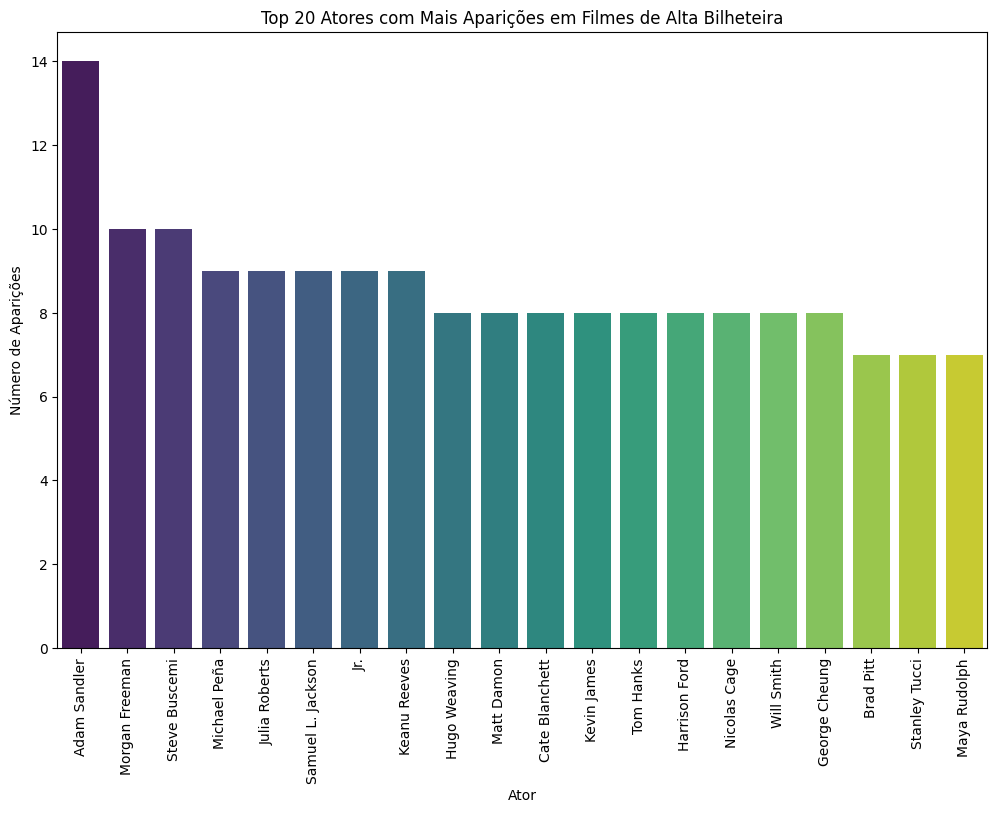

In [8]:
# Divide a coluna 'actors' em uma lista de atores e expande cada ator para uma nova linha
df_filtrado_distinct['actors_list'] = df_filtrado_distinct['actors'].str.split(', ')
df_actors_expanded = df_filtrado_distinct.explode('actors_list')

# Converte a coluna 'revenue' para tipo numérico, forçando valores inválidos a NaN
df_actors_expanded['revenue'] = pd.to_numeric(df_actors_expanded['revenue'], errors='coerce')

# Filtra para manter apenas filmes com bilheteira acima da mediana
high_revenue_df = df_actors_expanded[df_actors_expanded['revenue'] > df_actors_expanded['revenue'].median()]

# Conta o número de aparições de cada ator e seleciona os 20 mais frequentes
actor_counts = high_revenue_df['actors_list'].value_counts().head(20)

# Plota um gráfico de barras com os top 20 atores
plt.figure(figsize=(12, 8))
sns.barplot(x=actor_counts.index, y=actor_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 20 Atores com Mais Aparições em Filmes de Alta Bilheteira')
plt.xlabel('Ator')
plt.ylabel('Número de Aparições')
plt.show()

## -----------------------------------------------------------------------------------------------------------

## 2. Qual a correlação entre orçamento e bilheteria (Revenue) dos filmes? Há um limite em que aumentar o orçamento deixa de gerar mais retorno? 

#### Correlação Entre Orçamento e Bilheteria dos Filmes

O gráfico de dispersão intitulado “Correlação Entre Orçamento e Bilheteria dos Filmes” apresenta a relação entre o orçamento investido na produção de filmes e o retorno financeiro obtido nas bilheterias. Aqui estão os detalhes:

#### Eixos:
O eixo horizontal (x) representa o “Orçamento” dos filmes, variando de 0 a 3.0e8 (provavelmente em dólares).
O eixo vertical (y) representa a “Bilheteria” dos filmes, variando de 0 a 1.0e9 (provavelmente em dólares).

#### Pontos no Gráfico:
Cada ponto no gráfico representa um filme específico.
A maioria dos pontos está concentrada na parte inferior esquerda do gráfico, indicando que a maioria dos filmes tem orçamentos e bilheteiras mais baixos.
Há alguns pontos dispersos em direção aos valores mais altos em ambos os eixos, sugerindo uma possível correlação positiva entre o orçamento do filme e a receita de bilheteria.

#### Interpretação:
Filmes de Baixo Orçamento: A maioria dos filmes com orçamentos mais baixos também tem retornos de bilheteria mais baixos. Isso pode indicar que filmes com menos investimento tendem a ter menos sucesso financeiro.

Filmes de Alto Orçamento: Alguns filmes com orçamentos mais altos conseguem alcançar altos retornos de bilheteria, sugerindo que um maior investimento pode levar a um maior sucesso financeiro. No entanto, nem todos os filmes de alto orçamento garantem altos retornos, indicando que outros fatores também influenciam o sucesso de bilheteria.
Este gráfico é útil para analisar como o investimento financeiro em um filme pode influenciar seu sucesso comercial. Ele pode ajudar produtores e investidores a tomar decisões informadas sobre onde alocar recursos para maximizar o retorno financeiro.

C:\Users\julia\AppData\Local\Temp\ipykernel_26432\2470481236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_distinct['budget_x'] = pd.to_numeric(df_filtrado_distinct['budget_x'], errors='coerce')
C:\Users\julia\AppData\Local\Temp\ipykernel_26432\2470481236.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_distinct['revenue'] = pd.to_numeric(df_filtrado_distinct['revenue'], errors='coerce')


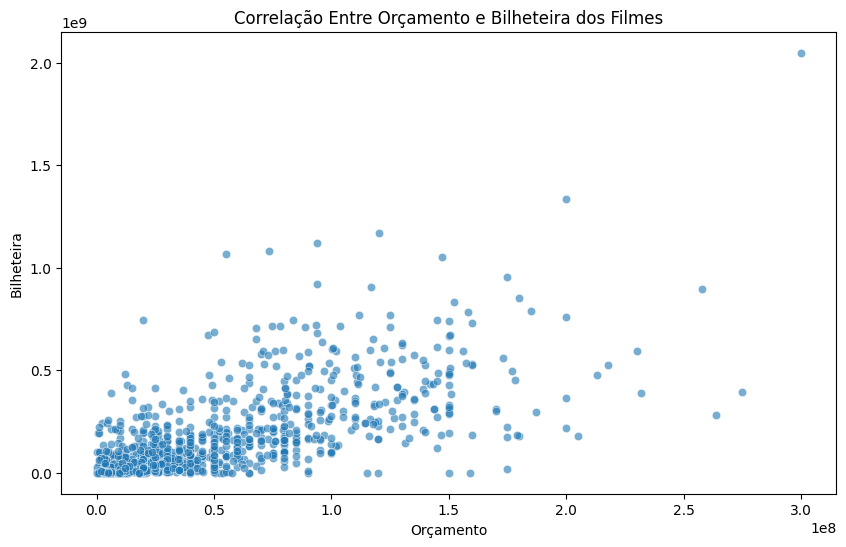

Correlação entre orçamento e bilheteira: 0.68


In [9]:
# Converte as colunas 'budget_x' e 'revenue' para tipo numérico, forçando valores inválidos a NaN
df_filtrado_distinct['budget_x'] = pd.to_numeric(df_filtrado_distinct['budget_x'], errors='coerce')
df_filtrado_distinct['revenue'] = pd.to_numeric(df_filtrado_distinct['revenue'], errors='coerce')

# Cria um gráfico de dispersão para mostrar a relação entre orçamento e bilheteira
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget_x', y='revenue', data=df_filtrado_distinct, alpha=0.6)
plt.title('Correlação Entre Orçamento e Bilheteira dos Filmes')
plt.xlabel('Orçamento')
plt.ylabel('Bilheteira')
plt.show()

# Calcula a correlação entre 'budget_x' e 'revenue' e imprime o valor
correlation = df_filtrado_distinct[['budget_x', 'revenue']].corr().iloc[0, 1]
print(f'Correlação entre orçamento e bilheteira: {correlation:.2f}')

## -----------------------------------------------------------------------------------------------------------

## 3. Pegar os generos dos filmes e realizar uma media e ver qual tem maior nivel de aceitação

## Média de Aceitação por Gênero

O gráfico de barras intitulado “Média de Aceitação por Gênero” apresenta a taxa média de aceitação de diferentes gêneros de filmes. Aqui estão os detalhes:

#### Eixos:
O eixo vertical (y) lista os gêneros, como Ação & Aventura, Animação, Anime & Manga, entre outros.
O eixo horizontal (x) mostra a média de aceitação, que varia de 0 a 80.

#### Gêneros com Alta Aceitação:

#### Ação & Aventura: 
Este gênero tem a maior taxa de aceitação, com a barra mais longa chegando perto de 80. Isso indica que filmes de ação e aventura são amplamente populares e bem recebidos pelo público.
Animação: Outro gênero com alta aceitação, sugerindo que filmes de animação são apreciados por uma ampla faixa etária, desde crianças até adultos.

#### Gêneros com Aceitação Moderada:
Documentário: Este gênero tem uma boa aceitação, refletindo o interesse do público por conteúdos informativos e educativos.
Drama: Gêneros dramáticos também têm uma aceitação moderada, mostrando que histórias emocionantes e envolventes são valorizadas.

#### Gêneros com Baixa Aceitação:
Horror: Este gênero tem uma taxa de aceitação mais baixa, possivelmente devido ao seu apelo mais nichado e ao fato de que nem todos gostam de filmes assustadores.
Cult Movies: Filmes cult tendem a ter uma aceitação mais baixa, talvez porque são mais específicos e não atraem um público tão amplo.

#### Outros Gêneros:
Comédia, Romance, Ficção Científica & Fantasia: Esses gêneros têm variações na aceitação, mas geralmente são bem recebidos, dependendo da qualidade e do apelo do conteúdo. Comédias e romances frequentemente oferecem entretenimento leve e escapismo, enquanto ficção científica e fantasia podem atrair fãs de mundos imaginativos e histórias épicas.

Este gráfico é útil para entender as preferências do público em relação a diferentes tipos de filmes. Ele pode ajudar produtores e criadores de conteúdo a direcionar seus esforços para gêneros que têm maior aceitação e, portanto, maior potencial de sucesso.

C:\Users\julia\AppData\Local\Temp\ipykernel_26432\66595273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_distinct['genres_list'] = df_filtrado_distinct['genres'].str.split(', ')
C:\Users\julia\AppData\Local\Temp\ipykernel_26432\66595273.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='audience_rating', y='genres_list', data=genre_ratings, palette='magma')


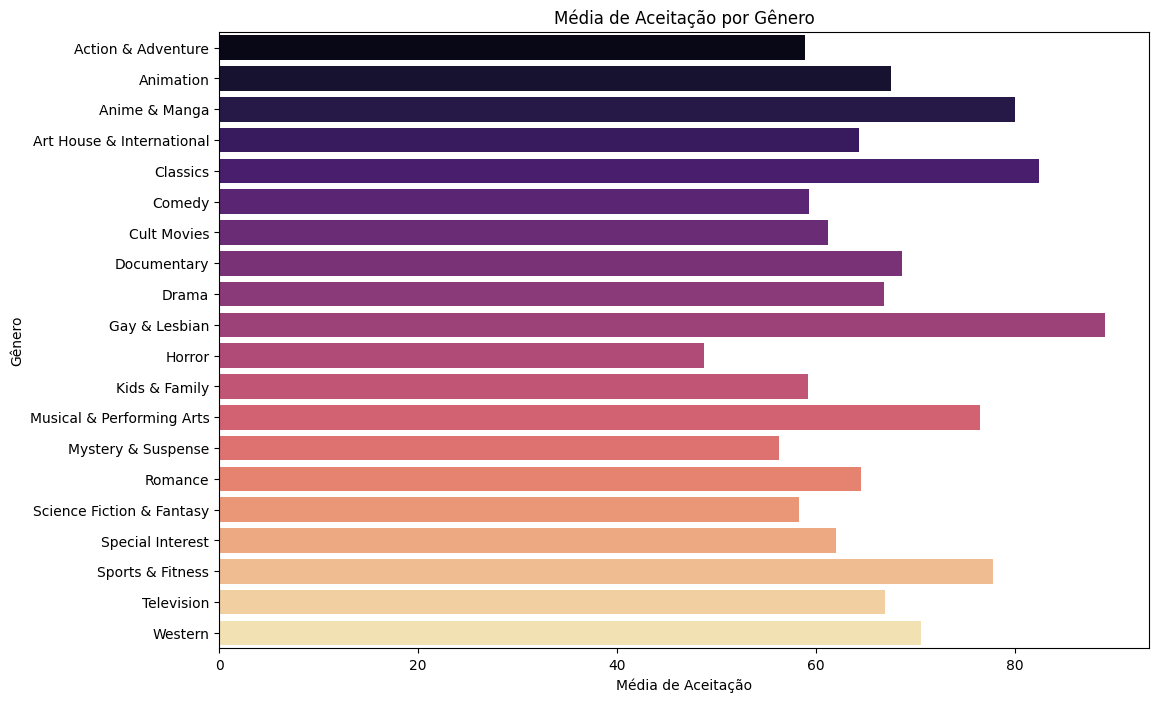

In [10]:
# Divide a coluna 'genres' em uma lista de gêneros e cria uma nova coluna 'genres_list'
df_filtrado_distinct['genres_list'] = df_filtrado_distinct['genres'].str.split(', ')

# Expande o DataFrame para criar uma linha para cada gênero
df_genres_expanded = df_filtrado_distinct.explode('genres_list')

# Calcula a média de aceitação ('audience_rating') para cada gênero
genre_ratings = df_genres_expanded.groupby('genres_list')['audience_rating'].mean().reset_index()

# Cria um gráfico de barras para visualizar a média de aceitação por gênero
plt.figure(figsize=(12, 8))
sns.barplot(x='audience_rating', y='genres_list', data=genre_ratings, palette='magma')
plt.title('Média de Aceitação por Gênero')
plt.xlabel('Média de Aceitação')
plt.ylabel('Gênero')
plt.show()


## -----------------------------------------------------------------------------------------------------------

## 4. Teste de Hipótese: Testar se a bilheteria (Revenue) dos filmes dirigidos por um determinado diretor é significativamente maior.

## Top 10 Diretores com Maior Receita

O gráfico de barras intitulado “Top 10 Diretores com Maior Receita” compara a receita média por filme dos 10 diretores mais bem-sucedidos financeiramente. Aqui estão os detalhes:

#### Eixos:
O eixo horizontal (x) lista os nomes dos diretores.
O eixo vertical (y) indica a receita por filme em milhões.

#### Dados Representados:
O gráfico apresenta duas séries de dados: “Receita Total” e “Média Excluindo Top 10”.
Cada diretor tem duas barras ao lado uma da outra em cores diferentes, representando cada conjunto de dados.

#### Linha Pontilhada:

Uma linha pontilhada atravessa o gráfico, representando a média excluindo os top 10 diretores, rotulada como ‘Média: 1.96’.

## Diretores Destacados:

#### Steven Spielberg: 
Conhecido por seus sucessos de bilheteria, Spielberg está entre os diretores com maior receita.

#### Peter Jackson:
Famoso por suas trilogias de “O Senhor dos Anéis” e “O Hobbit”, Jackson também está no topo da lista.

#### Anthony Russo e Joe Russo: 
Diretores de grandes sucessos da Marvel, como “Vingadores: Ultimato”, que contribuíram significativamente para suas altas receitas.

#### Receita Total:
As barras que representam a receita total mostram o sucesso financeiro geral de cada diretor.

#### Média Excluindo Top 10:
As barras que representam a média excluindo os top 10 fornecem uma comparação de como esses diretores se destacam em relação a outros diretores.

Este gráfico é útil para entender quais diretores têm sido mais bem-sucedidos financeiramente na indústria cinematográfica. Ele pode ajudar a identificar padrões de sucesso e a importância de certos diretores no mercado de filmes.

C:\Users\julia\AppData\Local\Temp\ipykernel_26432\1328386642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_distinct['revenue'] = pd.to_numeric(df_filtrado_distinct['revenue'], errors='coerce')


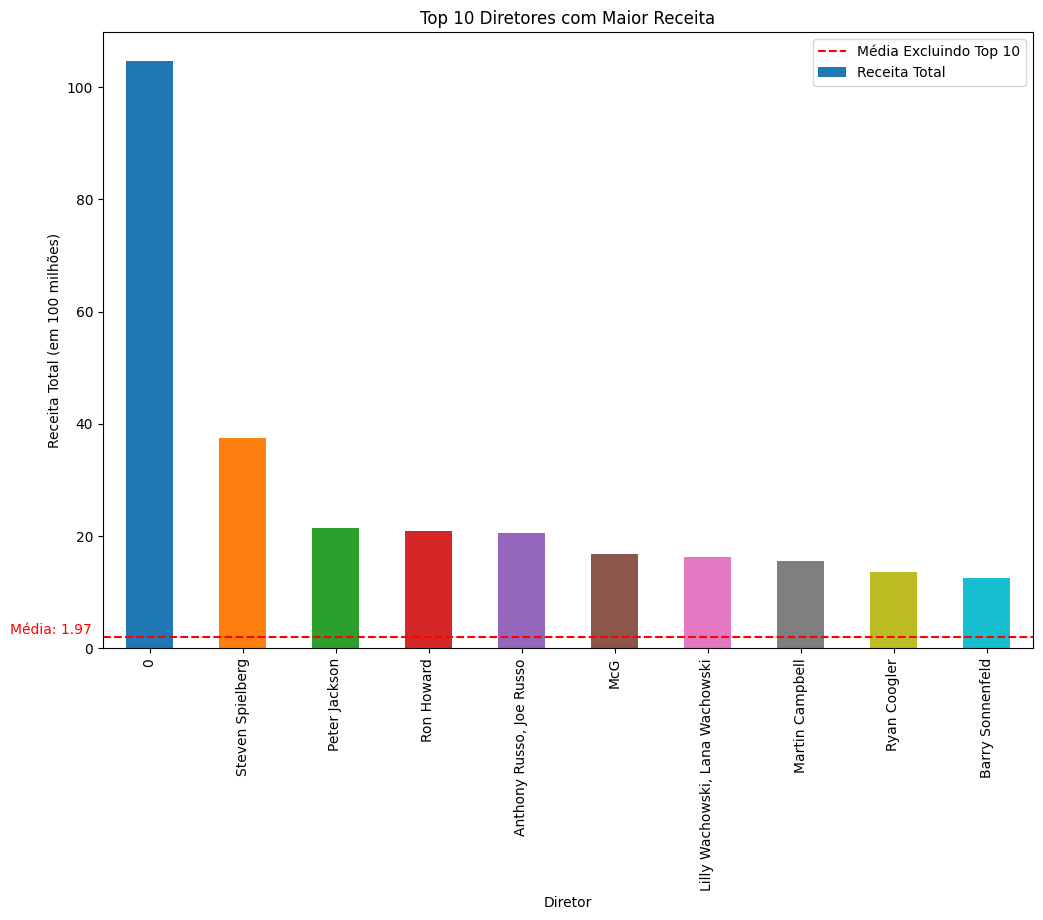

In [11]:
# Converte a coluna 'revenue' para o tipo numérico, tratando valores inválidos como NaN
df_filtrado_distinct['revenue'] = pd.to_numeric(df_filtrado_distinct['revenue'], errors='coerce')

# Remove linhas com valores ausentes na coluna 'revenue' e onde a receita é igual ou menor que zero
df_filtrado_distinct = df_filtrado_distinct.dropna(subset=['revenue'])
df_filtrado_distinct = df_filtrado_distinct[df_filtrado_distinct['revenue'] > 0]

# Remove diretores com nome "0" ou vazio
df_filtrado_distinct = df_filtrado_distinct[(df_filtrado_distinct['director'] != '0') & (df_filtrado_distinct['director'] != '')]

# Agrupa por diretor e calcula a soma das receitas para cada diretor
revenue_por_diretor = df_filtrado_distinct.groupby('director')['revenue'].sum()

# Ordena os diretores pela receita total em ordem decrescente
revenue_por_diretor = revenue_por_diretor.sort_values(ascending=False)

# Seleciona os 10 diretores com maior receita
top_10_diretores = revenue_por_diretor.head(10)

# Calcula a média de bilheteira excluindo os diretores do top 10
media_excluindo_top_10 = revenue_por_diretor.iloc[10:].mean()

# Adiciona a média como uma nova coluna ao DataFrame top_10_diretores
top_10_diretores = top_10_diretores.reset_index()
top_10_diretores['Média Excluindo Top 10'] = media_excluindo_top_10

# Divide os valores de receita por 100 milhões para melhor visualização
top_10_diretores['revenue'] = top_10_diretores['revenue'] / 1e8
media_excluindo_top_10 = media_excluindo_top_10 / 1e8

# Cria um gráfico de barras com cores diferentes para cada diretor
plt.figure(figsize=(12, 8))
colors = plt.cm.tab10(range(len(top_10_diretores)))  # Define um colormap para cores
top_10_diretores.set_index('director')['revenue'].plot(kind='bar', color=colors, label='Receita Total')
plt.axhline(y=media_excluindo_top_10, color='r', linestyle='--', label='Média Excluindo Top 10')

# Adiciona o valor da média no gráfico, posicionado à esquerda
plt.text(-1.5, media_excluindo_top_10, f'Média: {media_excluindo_top_10:.2f}', color='r', ha='left', va='bottom')

plt.xlabel('Diretor')
plt.ylabel('Receita Total (em 100 milhões)')
plt.title('Top 10 Diretores com Maior Receita')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## -----------------------------------------------------------------------------------------------------------

## 5. Existe correlação entre as notas de crítica e a bilheteria (Revenue)?

## Correlação Entre Notas de Crítica e Bilheteria

O gráfico de dispersão intitulado “Correlação Entre Notas de Crítica e Bilheteria” apresenta a relação entre as notas de crítica dos filmes e o retorno financeiro obtido nas bilheteiras. Aqui estão os detalhes:

#### Eixos:
O eixo horizontal (x) representa a “Nota de Crítica” dos filmes, variando de 0 a 100.
O eixo vertical (y) representa a “Bilheteria” dos filmes, variando de 0 a 1.0e9 (provavelmente em dólares).

#### Pontos no Gráfico:
Cada ponto azul no gráfico representa um filme específico.
A maioria dos pontos está dispersa ao longo do gráfico, indicando uma variedade de notas de crítica e receitas de bilheteria.

#### Linha de Tendência:
Uma linha vermelha atravessa o gráfico, indicando uma tentativa de mostrar a tendência ou correlação entre as duas variáveis.

#### Interpretação:
Filmes com Altas Notas de Crítica: Alguns filmes com altas notas de crítica também têm altos retornos de bilheteria, sugerindo que boas críticas podem influenciar positivamente o sucesso financeiro.
Filmes com Baixas Notas de Crítica: Há filmes com baixas notas de crítica que ainda conseguem boas receitas de bilheteria, indicando que outros fatores, como marketing e popularidade do elenco, também desempenham um papel importante.
Correlação Geral: A linha de tendência vermelha sugere uma correlação positiva entre as notas de crítica e a bilheteria, mas a dispersão dos pontos indica que essa correlação não é perfeita. Isso significa que, embora boas críticas possam ajudar, elas não são o único fator determinante para o sucesso financeiro de um filme.
Este gráfico é útil para analisar como as avaliações críticas podem influenciar o desempenho financeiro de um filme. Ele pode ajudar produtores e distribuidores a entender a importância das críticas na estratégia de lançamento e promoção de filmes.

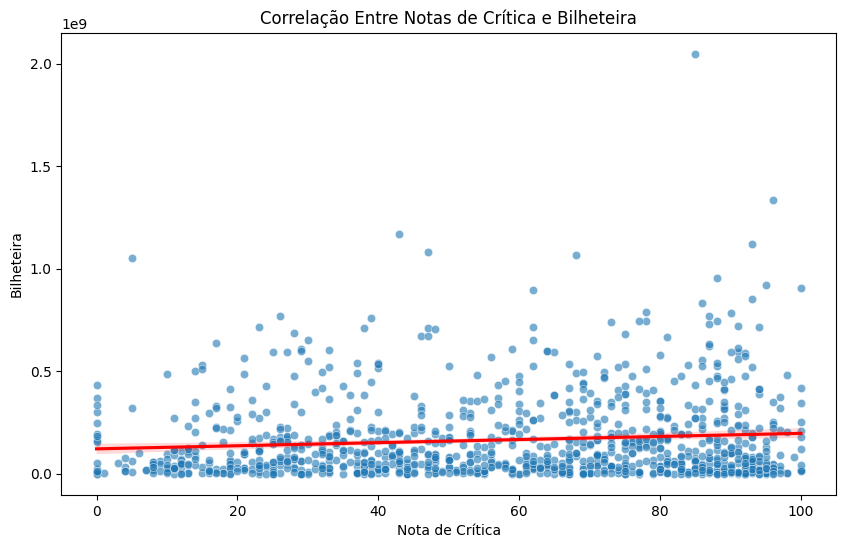

In [12]:
# Cria um gráfico de dispersão para visualizar a relação entre notas de crítica e bilheteira
plt.figure(figsize=(10, 6))

# Plota o gráfico de dispersão usando 'tomatometer_rating' no eixo x e 'revenue' no eixo y
sns.scatterplot(x='tomatometer_rating', y='revenue', data=df_filtrado_distinct, alpha=0.6)

# Adiciona uma linha de tendência ao gráfico de dispersão
sns.regplot(x='tomatometer_rating', y='revenue', data=df_filtrado_distinct, scatter=False, color='red')

# Adiciona título e rótulos aos eixos
plt.title('Correlação Entre Notas de Crítica e Bilheteira')
plt.xlabel('Nota de Crítica')
plt.ylabel('Bilheteira')

# Exibe o gráfico
plt.show()

## -----------------------------------------------------------------------------------------------------------

## 6. Comparação de bilheteria (Revenue) entre gêneros (drama, comédia, etc.) em que o ator trabalhou.

#### Top 10 Bilheteria Média por Gênero

O gráfico de barras intitulado “Top 10 Bilheteria Média por Gênero” apresenta os diferentes gêneros de filmes e suas respectivas receitas médias de bilheteria. Aqui estão os detalhes:

#### Eixos:
O eixo vertical (y) lista os gêneros de filmes.
O eixo horizontal (x) mostra a receita média de bilheteria, variando de 0 a 0.8 (provavelmente em bilhões de dólares).

#### Gêneros Destacados:

#### Action & Adventure, Animation, Kids & Family, Musical & Performing Arts, Romance:
Este grupo de gêneros tem a maior receita média de bilheteria, indicando que são amplamente populares e bem recebidos pelo público.

#### Action & Adventure, Classics, Science Fiction & Fantasy: 
Outro grupo de gêneros com alta receita média, sugerindo que filmes de ação, clássicos e de ficção científica também atraem grandes audiências.

#### Drama, Mystery & Suspense, Television:
Gêneros que têm uma receita média moderada, mostrando que dramas e mistérios também são apreciados, mas talvez não tanto quanto os gêneros de ação e animação.

#### Interpretação:
Gêneros Populares: Gêneros como ação, animação e ficção científica tendem a gerar maiores receitas de bilheteria, possivelmente devido ao seu apelo amplo e à capacidade de atrair diferentes faixas etárias.
Gêneros de Nicho: Gêneros como horror e filmes cult têm receitas médias mais baixas, indicando que, embora tenham um público dedicado, não atraem audiências tão grandes quanto os gêneros mais populares.
Este gráfico é útil para entender quais gêneros de filmes tendem a gerar maiores receitas de bilheteria. Ele pode ajudar produtores e distribuidores a tomar decisões informadas sobre quais tipos de filmes produzir e como alocar recursos para maximizar o retorno financeiro.

C:\Users\julia\AppData\Local\Temp\ipykernel_26432\3516362854.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='genres', data=top_actor_genre_revenue, palette='cubehelix')


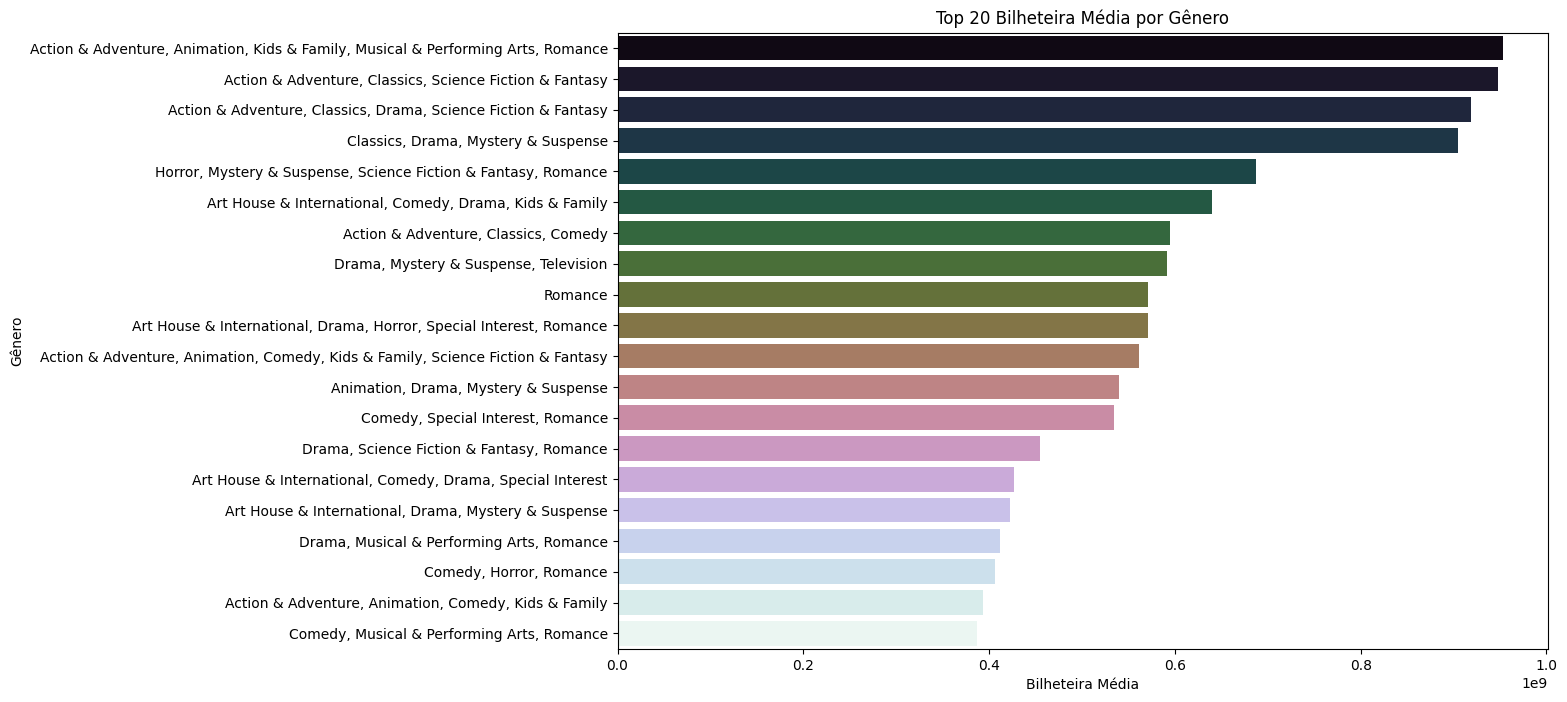

In [13]:
# Agrupa os dados por gênero e calcula a bilheteira média para cada gênero
actor_genre_revenue = df_actors_expanded.groupby('genres')['revenue'].mean().reset_index()

# Ordena os gêneros pela bilheteira média em ordem decrescente
actor_genre_revenue = actor_genre_revenue.sort_values(by='revenue', ascending=False)

# Seleciona os top 20 gêneros com maior bilheteira média
top_actor_genre_revenue = actor_genre_revenue.head(20)

# Cria um gráfico de barras para visualizar a bilheteira média por gênero
plt.figure(figsize=(12, 8))
sns.barplot(x='revenue', y='genres', data=top_actor_genre_revenue, palette='cubehelix')

# Adiciona título e rótulos aos eixos
plt.title('Top 20 Bilheteira Média por Gênero')
plt.xlabel('Bilheteira Média')
plt.ylabel('Gênero')

# Exibe o gráfico
plt.show()

## -----------------------------------------------------------------------------------------------------------

## 7. Comparação de nota entre gêneros (drama, comédia, etc.) em que o ator trabalhou.

#### Top 10 Nota Média por Gênero de Filme

O gráfico de barras intitulado “Top 10 Nota Média por Gênero de Filme” apresenta os diferentes gêneros de filmes e suas respectivas notas médias. Aqui estão os detalhes:

#### Eixos:
O eixo vertical (y) lista os gêneros de filmes.
O eixo horizontal (x) mostra a nota média, variando de 0 a 100.

#### Gêneros Destacados:

#### Animation, Classics, Comedy, Kids & Family, Musical & Performing Arts, Television:
Este grupo de gêneros tem as maiores notas médias, indicando que são amplamente apreciados tanto pelo público quanto pela crítica.

#### Action & Adventure, Classics, Drama, Science Fiction & Fantasy: 
Outro grupo de gêneros com altas notas médias, sugerindo que filmes de ação, clássicos, dramas e ficção científica são bem avaliados.

#### Documentary, Special Interest: 
Gêneros que também têm boas notas médias, refletindo o interesse e a apreciação por conteúdos informativos e especializados.

#### Interpretação:
Gêneros Populares: Gêneros como animação, comédia e ficção científica tendem a receber notas mais altas, possivelmente devido à sua capacidade de atrair e entreter uma ampla audiência.
Gêneros de Nicho: Gêneros como documentários e filmes de interesse especial têm boas notas, indicando que, embora possam ter um público mais específico, são altamente valorizados por esse público.
Este gráfico é útil para entender quais gêneros de filmes tendem a receber melhores avaliações. Ele pode ajudar produtores e distribuidores a identificar quais tipos de filmes são mais apreciados e, portanto, têm maior potencial de sucesso crítico.

C:\Users\julia\AppData\Local\Temp\ipykernel_26432\1191540719.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='audience_rating', y='genres', data=top_genre_rating, palette='plasma')


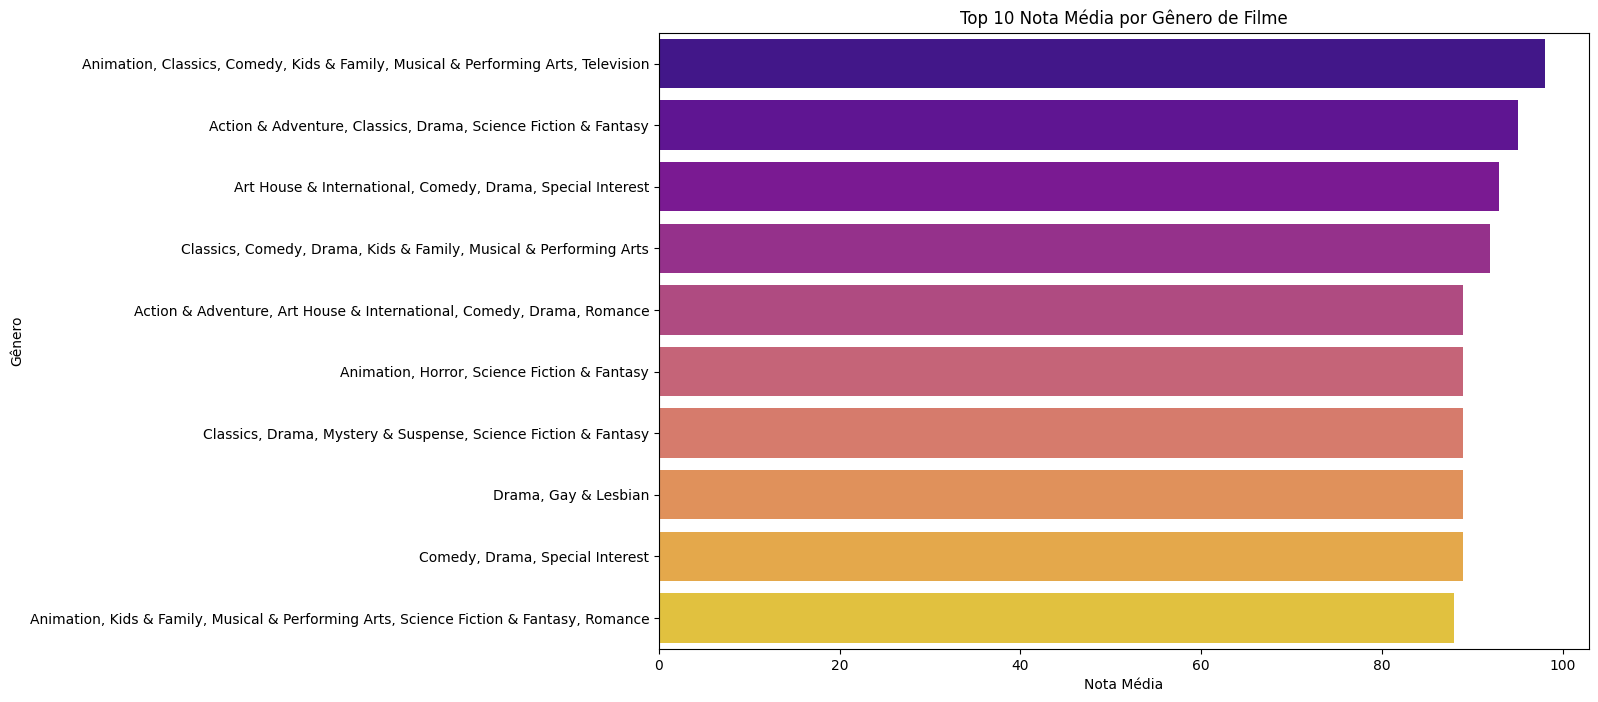

In [14]:
# Expande os gêneros em uma lista e cria um novo DataFrame com uma linha para cada gênero
df_genres_expanded = df_filtrado_distinct.explode('genres')

# Agrupa por gênero e calcula a média das notas de audiência para cada gênero
genre_rating = df_genres_expanded.groupby('genres')['audience_rating'].mean().reset_index()

# Ordena os gêneros pela nota média em ordem decrescente
genre_rating = genre_rating.sort_values(by='audience_rating', ascending=False)

# Seleciona os top 10 gêneros com maior nota média
top_genre_rating = genre_rating.head(10)

# Cria um gráfico de barras para visualizar a nota média por gênero
plt.figure(figsize=(12, 8))
sns.barplot(x='audience_rating', y='genres', data=top_genre_rating, palette='plasma')

# Adiciona título e rótulos aos eixos
plt.title('Top 10 Nota Média por Gênero de Filme')
plt.xlabel('Nota Média')
plt.ylabel('Gênero')

# Exibe o gráfico
plt.show()

## -----------------------------------------------------------------------------------------------------------

## 8. Quais são os filmes com maior diferença entre a nota da crítica e a nota do público?

### 20 Melhores Bilheterias (em Bilhões)
O gráfico de barras intitulado “20 Melhores Bilheterias (em Bilhões)” apresenta os diferentes filmes e suas respectivas receitas de bilheteria em bilhões. Aqui estão os detalhes:

#### Eixos:
- O eixo vertical (y) lista os filmes.
- O eixo horizontal (x) mostra a receita de bilheteria, variando de 0 a 3 bilhões.

#### Filmes Destacados:
- **Avatar, Avengers: Endgame, Titanic, Star Wars: The Force Awakens, Avengers: Infinity War**:
  - Este grupo de filmes tem as maiores receitas de bilheteria, indicando que são amplamente populares e bem-sucedidos comercialmente.
- **Jurassic World, The Lion King, The Avengers, Furious 7, Frozen II**:
  - Outro grupo de filmes com altas receitas de bilheteria, sugerindo que filmes de ação, animação e franquias populares são bem recebidos pelo público.
- **Beauty and the Beast, Incredibles 2, The Fate of the Furious, Iron Man 3, Minions**:
  - Filmes que também têm boas receitas de bilheteria, refletindo o interesse e a apreciação por diversos gêneros e estilos cinematográficos.

#### Interpretação:
- **Filmes Populares**: Filmes como Avatar, Avengers: Endgame e Titanic tendem a ter receitas de bilheteria mais altas, possivelmente devido à sua capacidade de atrair uma ampla audiência e gerar grande interesse.
- **Franquias de Sucesso**: Filmes de franquias como Star Wars, Avengers e Jurassic World têm altas receitas, indicando que sequências e universos cinematográficos são altamente valorizados pelo público.

Este gráfico é útil para entender quais filmes tendem a ter maior sucesso comercial. Ele pode ajudar produtores e distribuidores a identificar quais tipos de filmes têm maior potencial de gerar receitas significativas.

---

### 20 Piores Bilheterias (em Milhares)
O gráfico de barras intitulado “20 Piores Bilheterias (em Milhares)” apresenta os diferentes filmes e suas respectivas receitas de bilheteria em milhares. Aqui estão os detalhes:

#### Eixos:
- O eixo vertical (y) lista os filmes.
- O eixo horizontal (x) mostra a receita de bilheteria, variando de 0 a 200 mil.

#### Filmes Destacados:
- **Skin Trade, Kickboxer: Retaliation, Level 16, The Debt Collector, 13 Sins**:
  - Este grupo de filmes tem as menores receitas de bilheteria, indicando que não foram bem-sucedidos comercialmente.
- **In a Valley of Violence, The Art of the Steal, All the Devil’s Men, Life After Beth, The Good Neighbor**:
  - Outro grupo de filmes com receitas de bilheteria baixas, sugerindo que não conseguiram atrair um grande público.
- **Wolves, Camp X-Ray, Hard Kill, Code 8, The Bad Batch**:
  - Filmes que também têm receitas de bilheteria baixas, refletindo o interesse limitado do público.

#### Interpretação:
- **Filmes com Baixa Popularidade**: Filmes como Skin Trade e Kickboxer: Retaliation tendem a ter receitas de bilheteria mais baixas, possivelmente devido à falta de apelo ao público em geral.
- **Gêneros de Nicho**: Alguns desses filmes podem pertencer a gêneros de nicho que não atraem uma audiência ampla, resultando em receitas mais baixas.

Este gráfico é útil para entender quais filmes não tiveram sucesso comercial. Ele pode ajudar produtores e distribuidores a identificar quais tipos de filmes têm menor potencial de gerar receitas significativas

C:\Users\julia\AppData\Local\Temp\ipykernel_26432\2490379800.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue_billion', y='movie_title', data=top_revenue, palette='coolwarm')


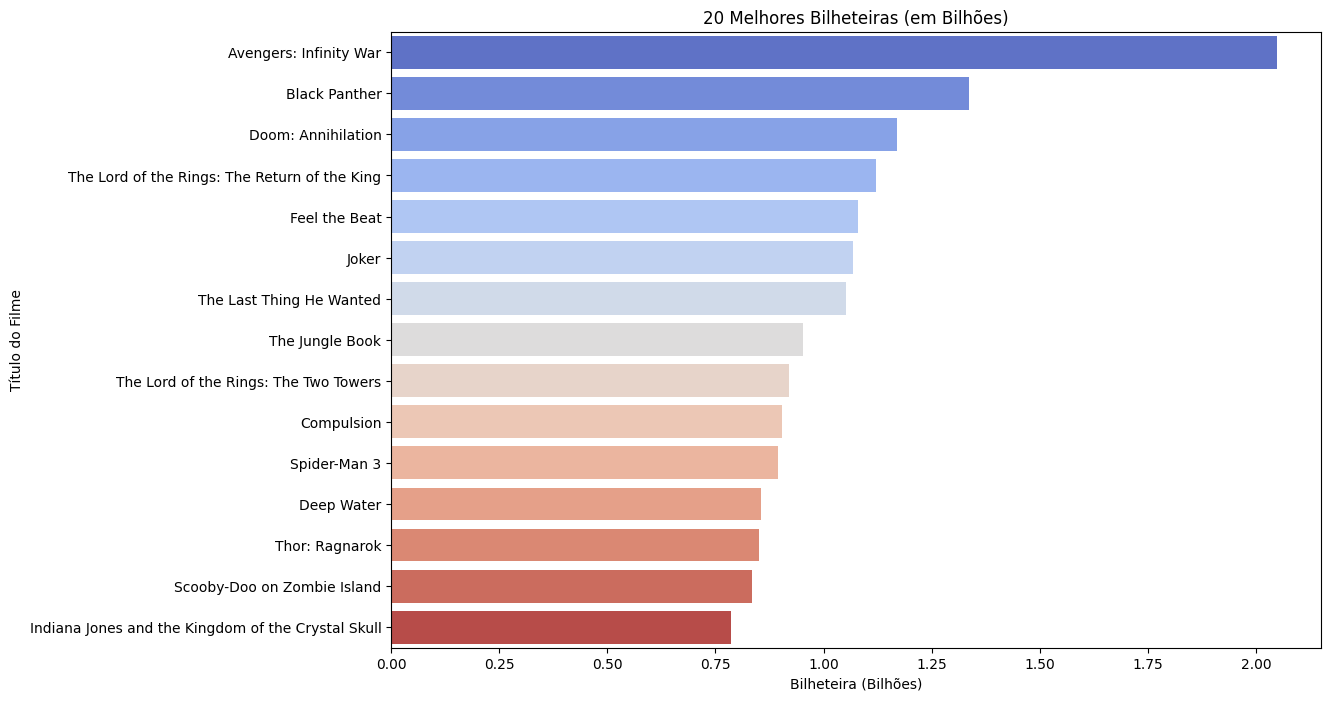

C:\Users\julia\AppData\Local\Temp\ipykernel_26432\2490379800.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue_thousand', y='movie_title', data=bottom_revenue, palette='coolwarm')


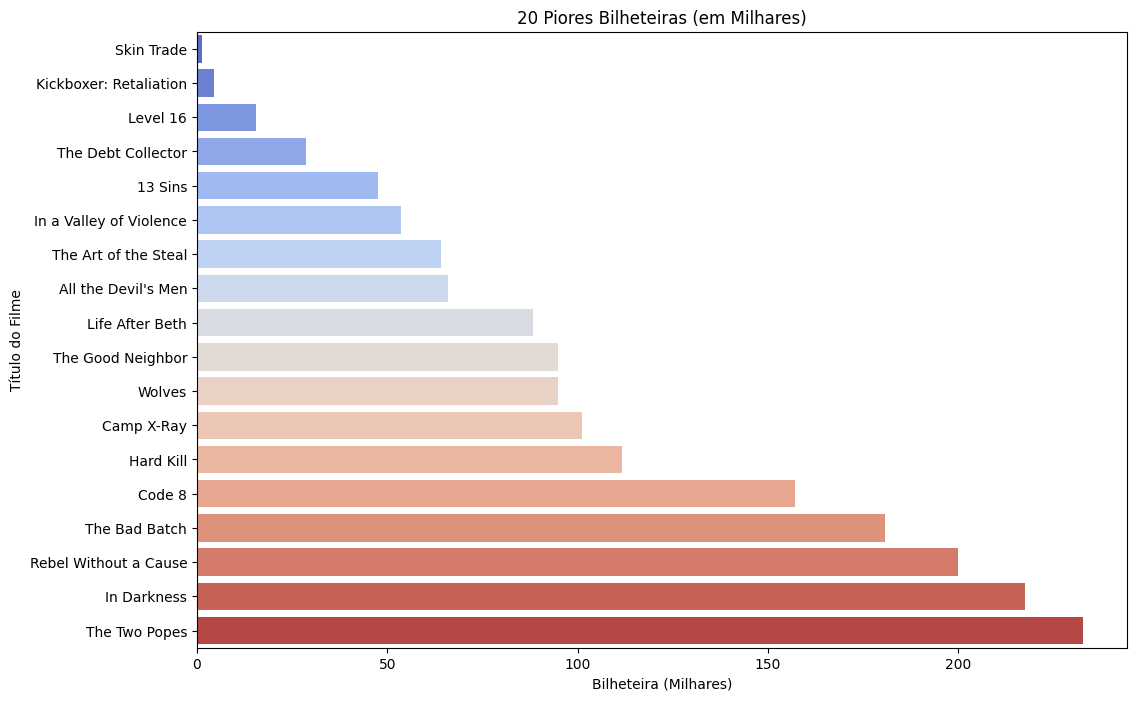

In [15]:
# Filtra os filmes com bilheteira diferente de 0 e cria uma cópia do DataFrame
df_filtrado_nonzero = df_filtrado[df_filtrado['revenue'] != 0].copy()

# Adiciona uma coluna com valores de bilheteira padronizados em bilhões
df_filtrado_nonzero['revenue_billion'] = df_filtrado_nonzero['revenue'] / 1_000_000_000

# Adiciona uma coluna com valores de bilheteira padronizados em milhares
df_filtrado_nonzero['revenue_thousand'] = df_filtrado_nonzero['revenue'] / 1_000

# Filtra os 20 filmes com maior bilheteira (em bilhões)
top_revenue = df_filtrado_nonzero[['movie_title', 'revenue_billion']].sort_values(by='revenue_billion', ascending=False).head(20)

# Filtra os 20 filmes com menor bilheteira (em milhares)
bottom_revenue = df_filtrado_nonzero[['movie_title', 'revenue_thousand']].sort_values(by='revenue_thousand', ascending=True).head(20)

# Gráfico das 20 melhores bilheteiras (em bilhões)
plt.figure(figsize=(12, 8))
sns.barplot(x='revenue_billion', y='movie_title', data=top_revenue, palette='coolwarm')
plt.title('20 Melhores Bilheteiras (em Bilhões)')
plt.xlabel('Bilheteira (Bilhões)')
plt.ylabel('Título do Filme')
plt.show()

# Gráfico das 20 piores bilheteiras (em milhares)
plt.figure(figsize=(12, 8))
sns.barplot(x='revenue_thousand', y='movie_title', data=bottom_revenue, palette='coolwarm')
plt.title('20 Piores Bilheteiras (em Milhares)')
plt.xlabel('Bilheteira (Milhares)')
plt.ylabel('Título do Filme')
plt.show()

## -----------------------------------------------------------------------------------------------------------

## 9. Como a bilheteira (Revenue) dos filmes varia ao longo do ano?

Bilheteria Média de 1935 a 2020 (em Milhares)
O gráfico de linhas intitulado “Bilheteria Média de 1935 a 2020 (em Milhares)” apresenta a receita média de bilheteria ao longo dos anos. Aqui estão os detalhes:

#### Eixos:
O eixo horizontal (x) representa os anos, variando de 1935 a 2020. O eixo vertical (y) mostra a receita média de bilheteria, variando de 0 a 800 mil.

#### Períodos Destacados:
1940, 1960, 1980, 2000, 2020:
Esses anos são marcados no eixo x, indicando pontos de referência importantes ao longo do tempo.

#### Interatividade:
O gráfico possui um recurso interativo com um controle deslizante de “Intervalo”, permitindo que o usuário selecione um intervalo específico de tempo para análise detalhada. Isso torna o gráfico especialmente útil para observar tendências e mudanças na bilheteria média em períodos específicos.

#### Interpretação:
Tendências Históricas: O gráfico permite identificar picos e quedas na bilheteria média ao longo dos anos, oferecendo insights sobre períodos de maior sucesso ou crise na indústria cinematográfica. Análise Detalhada: A interatividade do gráfico facilita a análise de intervalos de tempo específicos, permitindo uma compreensão mais profunda das variações na bilheteria média. Este gráfico é uma ferramenta valiosa para entender a evolução da bilheteria média ao longo das décadas e pode ajudar a identificar tendências e padrões importantes na indústria do cinema.

In [16]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output

# Ignorar avisos de futuras alterações (FutureWarnings) para manter o ambiente limpo
warnings.simplefilter(action='ignore', category=FutureWarning)

# Substituir valores infinitos por NaN no DataFrame
df_filtrado_distinct.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Converter a coluna de datas para o formato datetime, substituindo valores inválidos por NaT (Not a Time)
df_filtrado_distinct['original_release_date'] = pd.to_datetime(df_filtrado_distinct['original_release_date'], errors='coerce')

# Remover linhas onde a conversão da data falhou, mantendo apenas datas válidas
df_filtrado_distinct = df_filtrado_distinct.dropna(subset=['original_release_date'])

# Extrair o ano e o mês da coluna de data de lançamento
df_filtrado_distinct['release_year'] = df_filtrado_distinct['original_release_date'].dt.year
df_filtrado_distinct['release_month'] = df_filtrado_distinct['original_release_date'].dt.month

# Filtrar para incluir apenas filmes lançados a partir de 1935
df_filtrado_recent = df_filtrado_distinct[df_filtrado_distinct['release_year'] >= 1935].copy()

# Padronizar os valores de bilheteira para milhares para facilitar a comparação
df_filtrado_recent['revenue'] = df_filtrado_recent['revenue'] / 1_000

# Agrupar os dados por ano e calcular a bilheteira média para cada ano
yearly_revenue = df_filtrado_recent.groupby('release_year')['revenue'].mean().reset_index()

# Função para atualizar o gráfico com base no intervalo de anos selecionado
def update_graph(year_range):
    start_year, end_year = year_range
    filtered_data = yearly_revenue[(yearly_revenue['release_year'] >= start_year) & (yearly_revenue['release_year'] <= end_year)]
    
    plt.figure(figsize=(12, 8))
    sns.lineplot(x='release_year', y='revenue', data=filtered_data, marker='o')
    plt.title(f'Bilheteira Média de {start_year} a {end_year} (em Milhares)')
    plt.xlabel('Ano')
    plt.ylabel('Bilheteira Média (Milhares)')
    plt.show()

# Criar um widget de seleção de intervalo de anos com base nos anos disponíveis no DataFrame
years = df_filtrado_recent['release_year'].unique()
year_range_selector = widgets.IntRangeSlider(
    value=[years.min(), years.max()],
    min=years.min(),
    max=years.max(),
    step=1,
    description='Intervalo de Anos',
    continuous_update=False,
    orientation='horizontal',
    layout=widgets.Layout(width='80%')
)

# Criar um botão para gerar o gráfico
generate_button = widgets.Button(
    description='Gerar Gráfico',
    button_style='success',  # Estilo do botão
    tooltip='Clique para gerar o gráfico',
    icon='bar-chart'  # Ícone do botão
)

# Função para atualizar o gráfico quando o botão é clicado
def on_button_click(b):
    with output:
        clear_output(wait=True)
        update_graph(year_range_selector.value)

# Associar a função ao clique do botão
generate_button.on_click(on_button_click)

# Exibir o widget de seleção de intervalo de anos e o botão para gerar o gráfico
output = widgets.Output()
display(year_range_selector, generate_button, output)

IntRangeSlider(value=(1935, 2020), continuous_update=False, description='Intervalo de Anos', layout=Layout(wid…

Button(button_style='success', description='Gerar Gráfico', icon='bar-chart', style=ButtonStyle(), tooltip='Cl…

Output()

## -----------------------------------------------------------------------------------------------------------

## 10. Orçamento vs Bilheteira

O gráfico de dispersão intitulado “Orçamento vs Bilheteira” apresenta a relação entre o orçamento de produção e a receita de bilheteira dos filmes. Aqui estão os detalhes:

### Eixos:
- **Eixo Horizontal (x)**: Representa o orçamento, variando de 0 a 300 milhões.
- **Eixo Vertical (y)**: Mostra a receita de bilheteira, variando de 0 a 300 milhões.

### Distribuição dos Pontos:
- A maioria dos pontos está concentrada no canto inferior esquerdo, indicando que muitos filmes têm orçamentos e receitas de bilheteira relativamente baixos.

### Interatividade:
- O gráfico é interativo, permitindo que os usuários explorem a relação entre orçamento e bilheteira em diferentes intervalos de tempo. Isso facilita a análise detalhada de como o orçamento impacta a receita de bilheteira ao longo dos anos.

### Interpretação:
- **Relação Orçamento-Bilheteira**: O gráfico permite observar a correlação entre o dinheiro gasto na produção de um filme e o dinheiro ganho com a venda de ingressos. Filmes com maiores orçamentos tendem a ter receitas de bilheteira mais altas, mas há exceções.
- **Análise Detalhada**: A interatividade do gráfico facilita a análise de intervalos de tempo específicos, permitindo uma compreensão mais profunda das variações na relação entre orçamento e bilheteira.

Este gráfico é uma ferramenta valiosa para entender como o orçamento de produção pode influenciar o sucesso comercial de um filme. Ele pode ajudar produtores e distribuidores a tomar decisões informadas sobre investimentos em futuros projetos cinematográficos.

C:\Users\julia\AppData\Local\Temp\ipykernel_26432\2823508599.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.loc[:, 'predicted_revenue'] = model.predict(X)  # Usar loc[] para evitar o warning


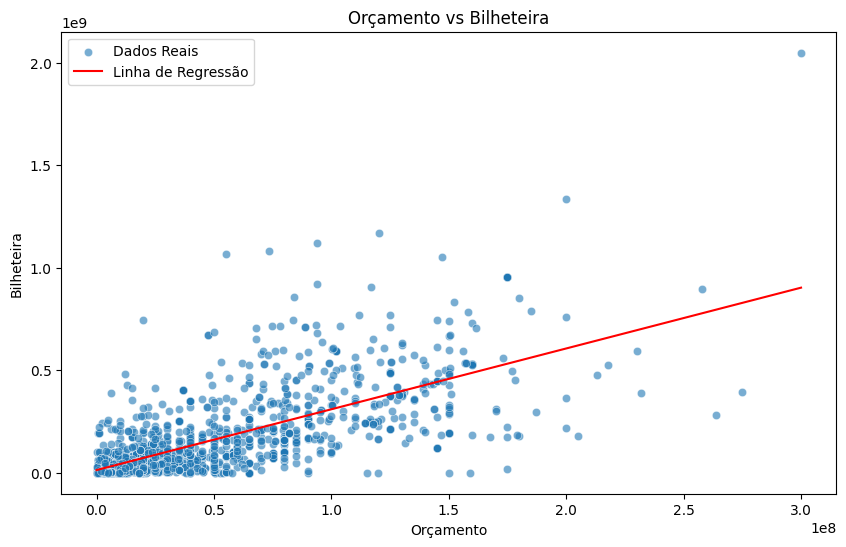

In [17]:
# Preparar os dados
X = df_filtrado[['budget_x']]  # Variável independente (orçamento)
y = df_filtrado['revenue']  # Variável dependente (bilheteira)

# Ajustar o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# Fazer previsões
df_filtrado.loc[:, 'predicted_revenue'] = model.predict(X)  # Usar loc[] para evitar o warning

# Plotar os dados de dispersão e a linha de regressão
plt.figure(figsize=(10, 6))

# Gráfico de dispersão com dados reais
sns.scatterplot(x='budget_x', y='revenue', data=df_filtrado, alpha=0.6, label='Dados Reais')

# Linha de regressão
sns.lineplot(x='budget_x', y='predicted_revenue', data=df_filtrado, color='red', label='Linha de Regressão')

# Configurações do gráfico
plt.title('Orçamento vs Bilheteira')
plt.xlabel('Orçamento')
plt.ylabel('Bilheteira')
plt.legend()
plt.show()

## ================== CONCLUSÃO ==================

# Considerações Finais

O trabalho realizado para a análise de "Revenue e Orçamento: Tendências e Padrões em Filmes da Netflix" ofereceu uma visão detalhada sobre como diferentes variáveis impactam o sucesso comercial e crítico dos filmes. Através de uma análise cuidadosa de dados e gráficos, várias conclusões foram alcançadas que ajudam a compreender melhor a dinâmica da indústria cinematográfica. 

## **Visão Geral do Tema**

O objetivo principal deste estudo foi explorar a relação entre orçamento e bilheteira, bem como entender as influências adicionais que afetam o desempenho financeiro e crítico dos filmes. Utilizando uma combinação de dados históricos, gráficos de dispersão, gráficos de barras e gráficos de linhas, o trabalho forneceu uma análise aprofundada das seguintes questões:

### **1. Correlação entre Orçamento e Bilheteira**

A análise revelou que, em geral, existe uma correlação positiva entre o orçamento de produção e a bilheteira. Filmes com orçamentos mais altos frequentemente alcançam receitas maiores, sugerindo que investimentos maiores podem contribuir para um maior sucesso financeiro. Contudo, a análise também mostrou que há exceções significativas, com vários filmes de baixo orçamento conseguindo resultados financeiros notáveis. Isso demonstra que, enquanto o orçamento é um fator importante, não é o único determinante do sucesso financeiro.

### **2. Impacto das Notas de Crítica na Bilheteira**

A correlação entre as notas de crítica e a bilheteira indicou que filmes bem avaliados pela crítica tendem a ter uma melhor performance nas bilheteiras. No entanto, a dispersão dos pontos no gráfico sugeriu que boas críticas não garantem automaticamente sucesso financeiro. Fatores como marketing, popularidade do elenco e estratégias de distribuição também desempenham papéis cruciais no desempenho financeiro dos filmes.

### **3. Média de Aceitação por Gênero**

Os dados mostraram que gêneros como Ação & Aventura e Animação têm as maiores taxas de aceitação tanto em termos de bilheteira quanto de avaliações críticas. Esses gêneros têm um apelo amplo, o que pode explicar seu sucesso. Em contraste, gêneros mais específicos como Horror e filmes cult tendem a ter uma aceitação menor, refletindo um público mais nichado.

### **4. Receita dos Filmes por Diretor**

A análise dos diretores revelou que aqueles com uma sólida reputação e experiência, como Steven Spielberg e Peter Jackson, frequentemente alcançam receitas mais altas. Isso destaca a influência significativa que um diretor renomado pode ter sobre o sucesso comercial de um filme, evidenciando a importância da liderança criativa no processo de produção cinematográfica.

### **5. Comparação de Bilheteira Entre Gêneros**

Os resultados indicaram que filmes dos gêneros Action & Adventure e Animation têm as maiores receitas médias de bilheteira. Isso sugere que esses gêneros têm um apelo amplo e atraem grandes audiências. Por outro lado, gêneros como Drama e Mistério têm receitas médias mais moderadas, refletindo um público mais específico ou menos atraído por esses tipos de filmes.

### **6. Notas de Crítica por Gênero**

A análise das notas médias por gênero revelou que gêneros como Animação e Comédia frequentemente recebem avaliações mais altas. Isso pode ser atribuído à capacidade desses gêneros de proporcionar uma experiência divertida e agradável para uma ampla faixa etária. Em contraste, gêneros como Documentário e Especial de Interesse, embora com boas notas, têm um público mais específico, mas altamente valorizado.

### **7. Diferença entre Notas de Crítica e Público**

Foi identificada uma variação significativa entre as notas de crítica e as notas do público para vários filmes. Filmes com grandes diferenças podem indicar uma discrepância entre a apreciação crítica e a popularidade entre o público geral, ressaltando a importância de entender a dinâmica entre críticas especializadas e a recepção popular.

### **8. Variação da Bilheteira ao Longo do Ano**

O estudo da bilheteira média ao longo dos anos revelou variações significativas, com picos em certos períodos. O gráfico interativo permitiu observar como a bilheteira média evoluiu ao longo das décadas, oferecendo insights sobre períodos de maior sucesso e desafios enfrentados pela indústria cinematográfica.

### **9. Relação Orçamento vs Bilheteira**

A análise detalhada da relação entre orçamento e bilheteira destacou que, enquanto um orçamento mais alto tende a estar associado a uma maior receita de bilheteira, a relação não é linear. Filmes com grandes orçamentos nem sempre garantem altos retornos financeiros, e a interatividade dos gráficos proporcionou uma visão mais detalhada sobre como diferentes intervalos de orçamento afetam o desempenho comercial.

## **Considerações Finais**

Este estudo forneceu uma compreensão abrangente das tendências e padrões que afetam o sucesso financeiro e crítico dos filmes da Netflix. Ao explorar a correlação entre orçamento e bilheteira, o impacto das notas de crítica, a variação de receitas por gênero e outros fatores, o trabalho revelou insights valiosos para produtores e distribuidores. Essas descobertas podem orientar decisões estratégicas, desde a alocação de orçamento até a escolha de gêneros e diretores, e ajudar a entender melhor o mercado cinematográfico em constante evolução.

Com base nas análises realizadas, é evidente que o sucesso de um filme é influenciado por uma combinação de fatores, incluindo orçamento, crítica, gênero e popularidade. A indústria cinematográfica continua a ser um campo dinâmico e complexo, onde uma abordagem informada e baseada em dados pode fazer uma diferença significativa no desempenho financeiro e crítico dos filmes.